In [2]:
FREECADPATH = "C:/Anaconda3/pkgs/freecad-0.17-py36_11/Library/bin"

In [3]:
import sys
import numpy as np
from matplotlib import pyplot as plt

In [4]:
sys.path.append(FREECADPATH)

In [5]:
from FreeCAD import Part

In [6]:
model = Part.read("./mesh.stp")

In [10]:
line = Part.makeLine((0.5, 1.025, -1), (0.5, 1.025, 0))

In [11]:
dist = model.Shells[0].distToShape(line)
print(dist)

(0.0, [(Vector (0.5, 1.025, -0.04330127018922281), Vector (0.5, 1.025, -0.04330127018922281))], [(b'Face', 34, (8.377580409572772, 0.5), b'Edge', 0, 0.9566987298107772)])


In [12]:
info = dist[2][0]
print(info)

(b'Face', 34, (8.377580409572772, 0.5), b'Edge', 0, 0.9566987298107772)


In [13]:
normal = model.Faces[info[1]].normalAt(info[2][0], info[2][1])
print(normal)
normal[1]

Vector (0.0, 0.49999999999999156, -0.8660254037844436)


0.49999999999999156

In [14]:
type(normal)

Base.Vector

In [15]:
np.array(normal)

array([ 0.       ,  0.5      , -0.8660254])

In [16]:
y = np.arange(-.2,.2,0.0001)

In [17]:
ang = list()
zs = []
for y0 in y:
    line = Part.makeLine((0.5, y0, -1), (0.5, y0, 0))
    dist = model.Shells[0].distToShape(line)
    if dist[0] < 0.00001:
        info = dist[2][0]
        zs.append(dist[1][0][0][2])
        if info [0] == b'Face':
            normal = model.Faces[info[1]].normalAt(info[2][0], info[2][1])
            ang.append(normal[1]/normal[2])
        else:
            ang.append(np.NaN)
    else:
        ang.append(np.NaN)
ang = np.array(ang)
#ang[ang=="NaN"]=-1
#ang

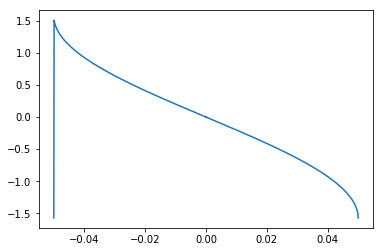

In [18]:
plt.plot(y,np.arctan(ang))
plt.show()


In [19]:
zs

[0.0,
 -0.003160696125594775,
 -0.004467661580555893,
 -0.005469003565394814,
 -0.006311893535092983,
 -0.007053367989719783,
 -0.007722693830417127,
 -0.00833726573873772,
 -0.008908422980439257,
 -0.009444045743133955,
 -0.009949874370986045,
 -0.010430244484115114,
 -0.010888526070976123,
 -0.011327400407787902,
 -0.011749042514111352,
 -0.012155245781074742,
 -0.012547509713022764,
 -0.01292710331042346,
 -0.013295111883633526,
 -0.013652472303521623,
 -0.013999999999943613,
 -0.014338409953632336,
 -0.014668333238593956,
 -0.014990330216454684,
 -0.01530490117571448,
 -0.015612494995945747,
 -0.0159135162675752,
 -0.01620833119104015,
 -0.016497272501792892,
 -0.016780643610970092,
 -0.017058722109184465,
 -0.017331762749310142,
 -0.017599999999954097,
 -0.01786365024283665,
 -0.01812291367298391,
 -0.018377975949447567,
 -0.018629009635469318,
 -0.01887617546004683,
 -0.019119623427213073,
 -0.01935949379499391,
 -0.01959591794222426,
 -0.019829019138587922,
 -0.02005891323074338

In [20]:
ang

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])